<a href="https://colab.research.google.com/github/LenGallo/Essentials_Notebooks/blob/master/Paleomagnetic_Poles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Get started**
To use the functions in this notebook, we have to import the PmagPy modules pmagplotlib, pmag and ipmag and some other handy functions for use in the notebook. This is done in the following code block which must be executed before running any other code block. To execute, click on the code block and then click on the "Run" button in the menu.

Try it! Run the code block below (click on the cell and then click 'Run'):

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
!mamba install -q -c conda-forge cartopy

In [4]:
import cartopy
cartopy.__version__

'0.22.0'

In [26]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

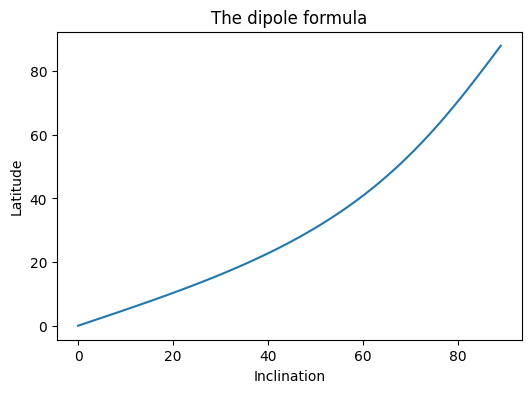

In [32]:
plt.figure(figsize=(6,4))
plt.plot(inclination,latitude)
plt.ylabel('Latitude')
plt.xlabel('Inclination')
plt.title('The dipole formula')
plt.show()

In [46]:
url = 'https://raw.githubusercontent.com/LenGallo/Young_CEED_2.0/master/PSV10.csv'
df = pd.read_csv(url, encoding='cp1252')

In [44]:
df

,age,age_pm,age_high,age_low,site_lat,site_lon,model_lat,model_lon,plate,nn,...,dec,inc,model_vgp_lat,model_vgp_lon,site,site_ID,location,psv10_location,reference,magic_method_code
0,2.600,0.0002,999.000,999.000,18.450,264.650,18.586479,264.871449,NaN,5,...,334.700000,27.100000,65.4,168.8,SRG1,1,Mexico,Mexico,Alvavaldivia01,GM-KAR:LP-DC5:LP-DIR
1,2.600,0.0002,999.000,999.000,18.467,264.656,18.603423,264.877626,NaN,5,...,343.900000,43.300000,73.7,201.7,SRG2,2,Mexico,Mexico,Alvavaldivia01,GM-KAR:LP-DC5:LP-DIR
2,2.200,0.0003,999.000,999.000,18.422,264.667,18.537483,264.854048,NaN,7,...,172.100000,-29.400000,-81.9,335.7,SRG3,3,Mexico,Mexico,Alvavaldivia01,GM-KAR:LP-DC5:LP-DIR:LP-PI-ALT-PTRM:LP-PI-TRM-ZI
3,3.100,0.0002,999.000,999.000,18.417,264.780,18.578075,265.043928,NaN,7,...,182.000000,-18.600000,-80.8,252.7,SRG5,4,Mexico,Mexico,Alvavaldivia01,GM-KAR:LP-DC5:LP-DIR
4,1.400,0.0002,999.000,999.000,18.234,265.133,18.305362,265.251062,NaN,6,...,173.900000,-30.400000,-83.9,337.6,SRG6,5,Mexico,Mexico,Alvavaldivia01,GM-KAR:LP-DC5:LP-DIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,0.525,999.0000,0.822,0.227,40.500,113.650,40.549556,113.511587,EU,7,...,333.600000,65.500000,69.9,53.0,DX15,2400,"Datong, China",China,Yamamoto07,GM-CC:GM-KAR:LP-DC5
2397,0.525,999.0000,0.822,0.227,40.500,113.650,40.549556,113.511587,EU,18,...,-41.450043,68.309049,59.7,58.8,DX16:DX22,2401,"""Datong, China""",China,Yamamoto07,GM-CC:GM-KAR:LP-DC5:LP-PI-ARM:GM-CC:GM-KAR:LP-...
2398,0.525,999.0000,0.822,0.227,40.000,113.800,40.049710,113.662580,EU,7,...,351.100000,24.000000,61.4,312.1,DX17,2402,"Datong, China",China,Yamamoto07,GM-CC:GM-KAR:LP-DC5:LP-PI-ARM
2399,0.525,999.0000,0.822,0.227,40.500,113.650,40.549556,113.511587,EU,9,...,4.500000,64.300000,83.6,142.6,DX20,2403,"Datong, China",China,Yamamoto07,GM-CC:GM-KAR:LP-DC5


In [24]:

url = 'https://raw.githubusercontent.com/LenGallo/Young_CEED_2.0/master/Torsvik-etal-2012_dataset.csv'
df = pd.read_csv(url, encoding='cp1252')
df.RLat.fillna(df.Lat, inplace=True)
df.RLon.fillna(df.Lon, inplace=True)
df.head()

,Q,a95,Plate,Plate_code,Lat,Lon,CLat,CLon,RLat,RLon,Eplat,Eplong,Epang,Age
0,5,4.8,north_america,101,-86.3,5.7,NaN,NaN,-86.3,5.7,NaN,NaN,NaN,0.5
1,5,9.1,north_america,101,-86.4,8.4,NaN,NaN,-86.4,9.2,79.2,23.0,0.2,0.8
2,5,7.1,north_america,101,-85.3,265.9,NaN,NaN,-85.3,-94.1,79.9,22.7,0.3,1.0
3,5,8.7,north_america,101,-88.4,225.5,NaN,NaN,-88.4,-135.7,79.9,22.7,0.3,1.0
4,5,4.3,north_america,101,-88.9,285.0,NaN,NaN,-88.9,-75.1,79.9,22.7,0.3,1.0


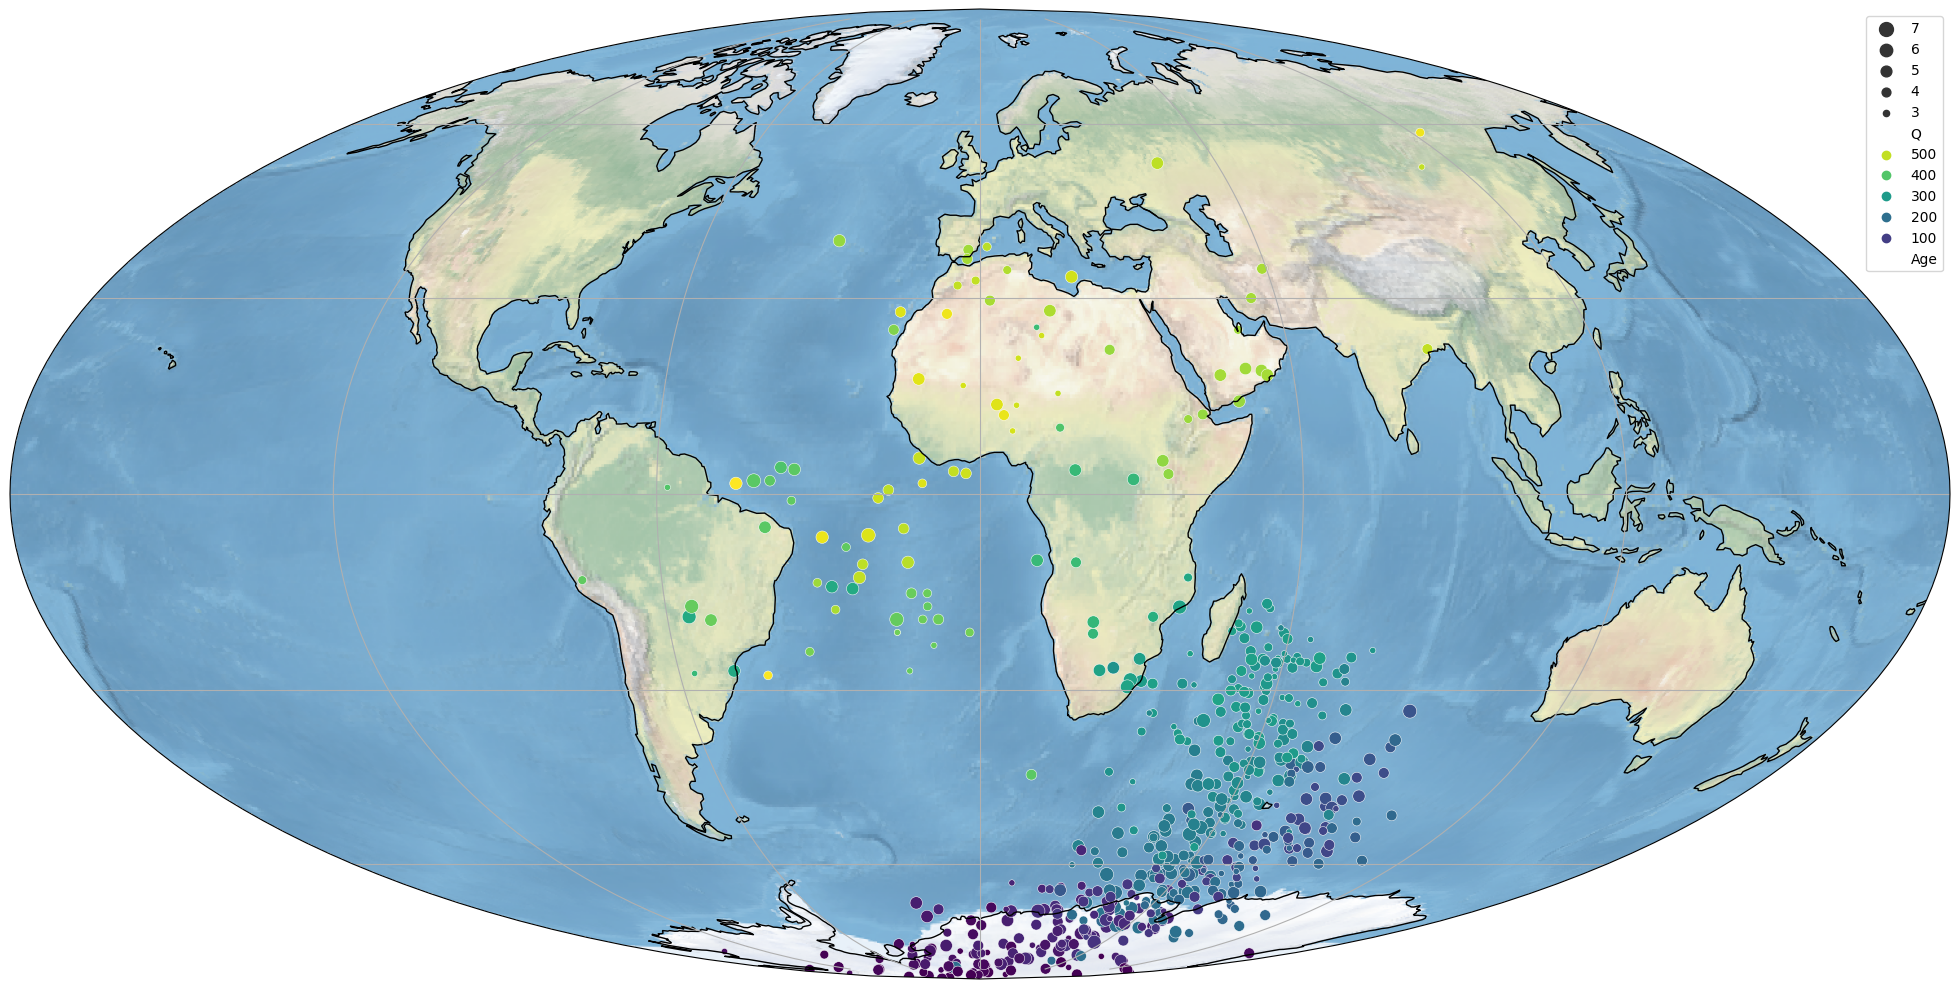

In [40]:
fig = plt.figure(figsize=(20,10))

proj = ccrs.Mollweide()

ax = plt.axes(projection=proj)
ax.coastlines()
ax.stock_img()
ax.gridlines()


sns.scatterplot(x = df['RLon'].dropna(), y = df['RLat'].dropna(),
                hue = df['Age'],  size = df['Q'], sizes=(20, 100),
                palette="viridis",
                transform = ccrs.PlateCarree())

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
plt.show()

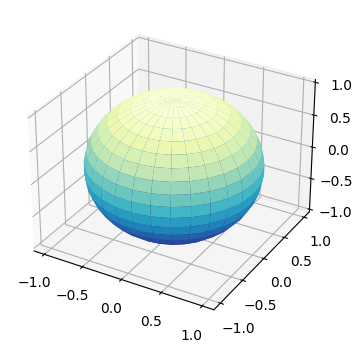

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
plt.show()

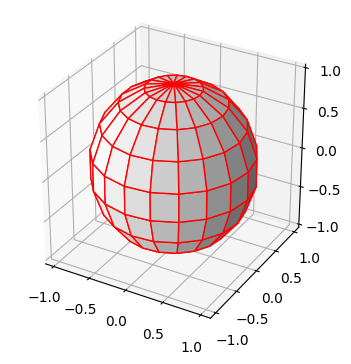

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="w", edgecolor="r")

plt.show()